## Function API で実装してみる
- Reference: https://www.tensorflow.org/guide/keras/functional?hl=ja

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape=(784,))

In [3]:
img_inputs = keras.Input(shape=(32, 32, 3))

In [5]:
inputs.shape

TensorShape([None, 784])

In [6]:
inputs.dtype

tf.float32

In [7]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [8]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [9]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [10]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


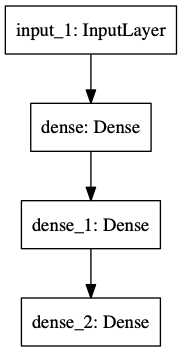

In [11]:
keras.utils.plot_model(model, "data/my_first_model.png")

In [12]:
#!pip install pydot

In [13]:
#!pip install graphviz

In [14]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [15]:
#!pip install pydotplus

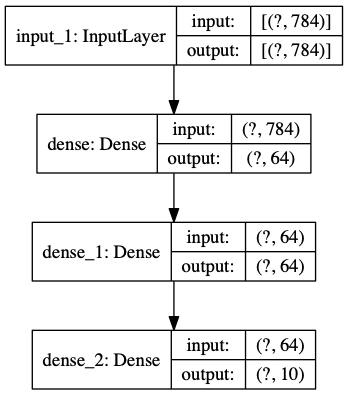

In [16]:
keras.utils.plot_model(model, "data/my_first_model_with_shape_info.png", show_shapes=True)

### Training, evaluation, and inference

In [17]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 2s 43us/sample - loss: 0.3475 - accuracy: 0.9019 - val_loss: 0.1891 - val_accuracy: 0.9487
Epoch 2/2
48000/48000 [==============================] - 1s 24us/sample - loss: 0.1616 - accuracy: 0.9521 - val_loss: 0.1403 - val_accuracy: 0.9594
10000/1 - 0s - loss: 0.0729 - accuracy: 0.9603
Test loss: 0.13692623113095762
Test accuracy: 0.9603
